In [91]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import networkx as nx


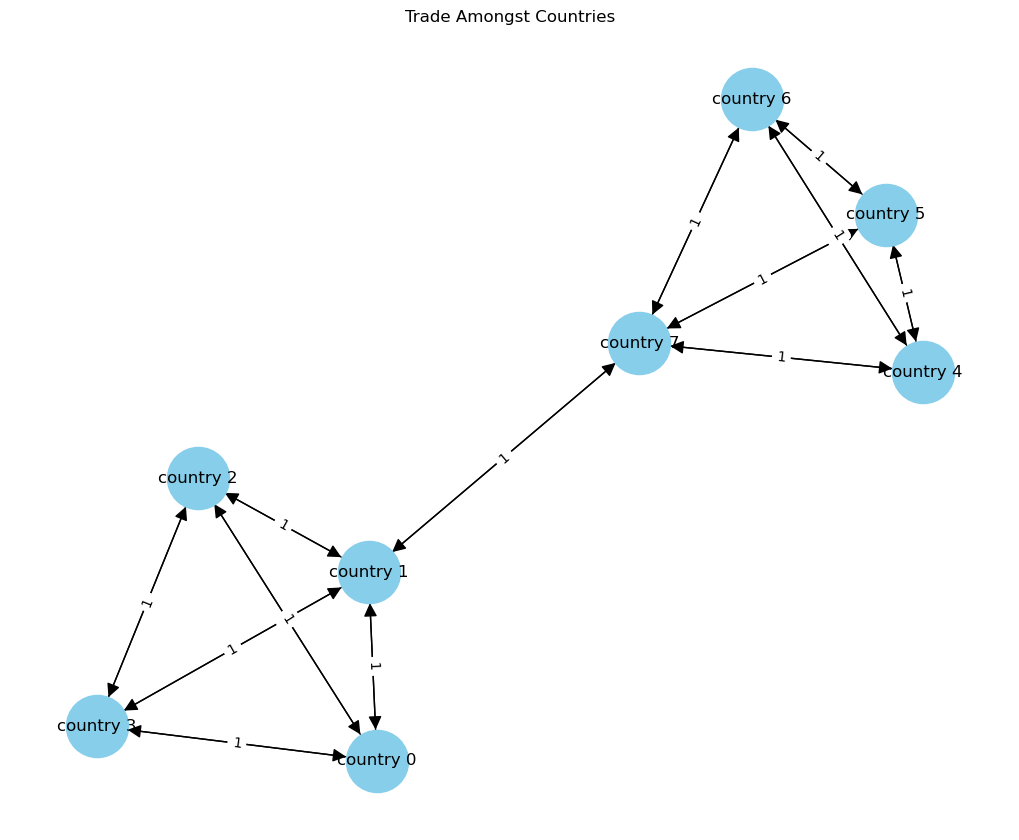

In [ ]:

#adjacency matrix where a each index is a weight from row i to column j

# Define countries
countries = [f"country {i}" for i in range(8)]

# Assign weights to adjacency matrix
A = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],  # France
    [1, 0, 1, 1, 0, 0, 0, 1],  # Germany
    [1, 1, 0, 1, 0, 0, 0, 0],  # Italy
    [1, 1, 1, 0, 0, 0, 0, 0],  # Spain
    [0, 0, 0, 0, 0, 1, 1, 1],  # Singapore
    """_summary_
    """    [0, 0, 0, 0, 1, 0, 1, 1],  # Malaysia
    [0, 0, 0, 0, 1, 1, 0, 1],  # Thailand
    [0, 1, 0, 0, 1, 1, 1, 0]  # Indonesia
])
def draw_graph(A, nodes=None):
    G = nx.DiGraph(A)
    
    global labels
    
    if nodes:
        labels = {i: f"{name}" for i, name in enumerate(nodes)}
    else: 
        labels = {i: f"$x_{i}$" for i in range(len(A))}
            

    # Draw the graph
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=1.5)  # Use spring layout for positioning
    nx.draw(G, pos, node_color='skyblue', node_size=2000, font_size=15, arrowsize=20)
    nx.draw_networkx_labels(G, pos, labels, font_size=12)

    edge_labels = nx.get_edge_attributes(G, "weight")  # Get weights as edge labels
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10) # Draw edge labels

    plt.title("Trade Amongst Countries")
    plt.savefig("directed_graph.png", dpi=300)
    
draw_graph(A, nodes=countries)

In [93]:
#define the lagrangian

def adjacency_to_lagrangian(A):
     L = np.zeros_like(A)

     #populate langrangian matrix with differentials
     for i, row in enumerate(A):
          for j, column in enumerate(row):
               if column != 0:
                    L[j][i] += column
                    L[j][j] += -column
               
     #force the diagonal to be positive

     L = -L

     print(np.linalg.eigvals(L))
     print()
     print(L)
     return L

[5.64575131e+00 1.04408676e-16 3.54248689e-01 4.00000000e+00
 4.00000000e+00 4.00000000e+00 4.00000000e+00 4.00000000e+00]

[[ 3 -1 -1 -1  0  0  0  0]
 [-1  4 -1 -1  0  0  0 -1]
 [-1 -1  3 -1  0  0  0  0]
 [-1 -1 -1  3  0  0  0  0]
 [ 0  0  0  0  3 -1 -1 -1]
 [ 0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0 -1 -1  3 -1]
 [ 0 -1  0  0 -1 -1 -1  4]]
[[2.26787117 9.0861238  8.12333007 3.26870145 6.71921398 0.06119221
  3.85102258 4.64316255]]
[4.76082807 4.75990705 4.76082807 4.76082807 4.74432638 4.74432638
 4.74432638 4.7452474 ]


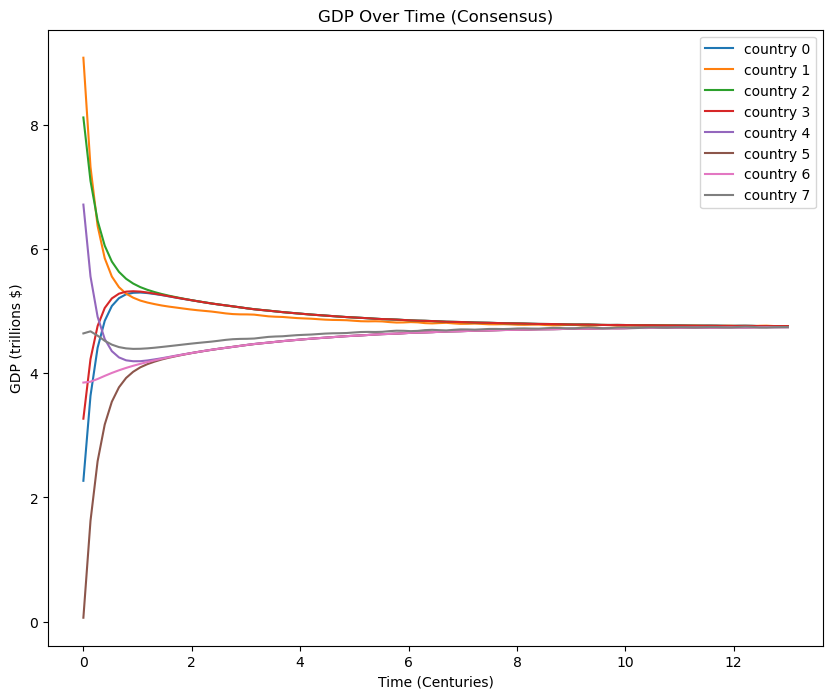

In [97]:
#plotting

def fun(t, y):
    dy = -L@y
    return dy

t0 = 0
tf = 13
t_step = 100
t_span = (t0, tf)
t_eval = np.linspace(*t_span, t_step)
#y0 = [1, 2, 3, 4]
L = adjacency_to_lagrangian(A)
# pre set initial conditions
y0_set=[[1, 2, 3, 4],
        [4, 5, 6, 7],
        [8, 9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]]

# randomized initial conditions
# n = number of initial conditions
n = 1
scale = 10
y0_rand = np.random.rand(n, L.shape[0]) * scale

print(y0_rand)

plt.figure(figsize=(10,8))

global sol

for i in range(len(y0_rand)):
    sol = solve_ivp(fun, t_span, y0_rand[i], t_eval=t_eval)
    for j, trajectory in enumerate(sol.y):
        plt.plot(sol.t, trajectory, label=labels[j])
        
print(sol.y[:,99])
        
plt.legend()
plt.title("GDP Over Time (Consensus)")
plt.xlabel("Time (Centuries)")
plt.ylabel("GDP (trillions $)")
plt.savefig("consensus.png", dpi=300)




In [98]:
print(np.average(sol.y[:,99]))

4.75257722521467
